In [33]:
# 기본 import

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [34]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


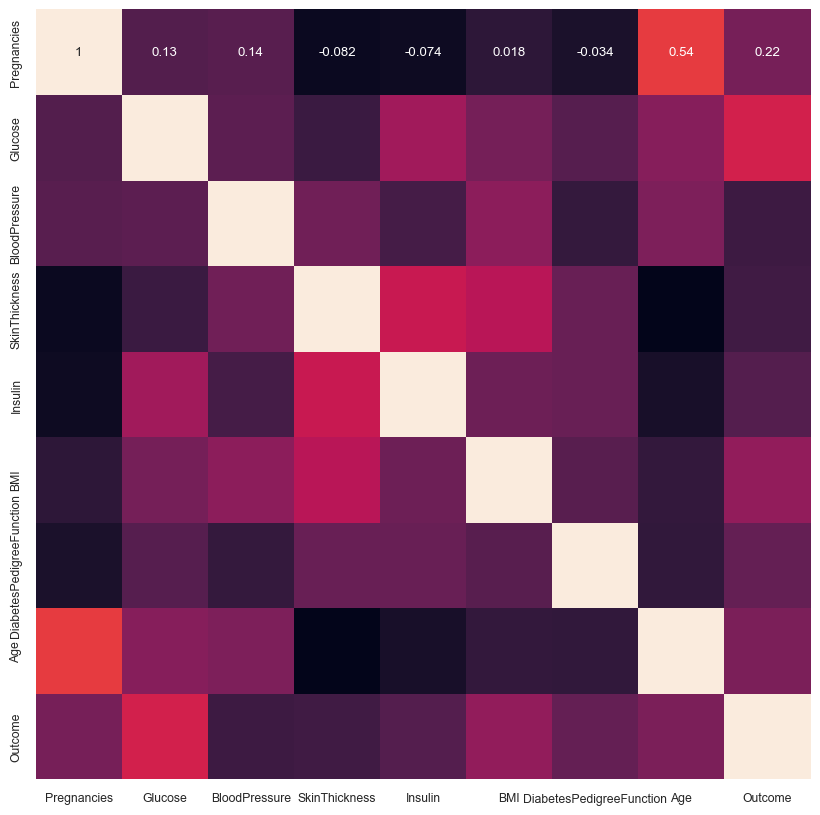

In [35]:
# 결측치 직관확인

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [36]:
# 데이터 분류

X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X.head())
print(y.value_counts())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Outcome
0    500
1    268
Name: count, dtype: int64


In [37]:
# classification 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [38]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.7708333333333334
[[119  11]
 [ 33  29]]


In [39]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7916666666666666
[[115  15]
 [ 25  37]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print ("\n--- Radom Forest ---")
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7708333333333334
[[116  14]
 [ 30  32]]


In [41]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.71875
[[102  28]
 [ 26  36]]


In [42]:
clf_dt = KNeighborsClassifier(n_neighbors=3)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- KNN Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- KNN Classifier ---
0.6979166666666666
[[100  30]
 [ 28  34]]


In [54]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df["Outcome"]=LabelEncoder().fit_transform(df["Outcome"]) ### 회귀 위한 데이터 숫자화

# 데이터 분류
X=df.drop('Outcome',axis=1)
y = pd.get_dummies(df['Outcome']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [55]:
# 딥러닝 모델

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(X_train.shape[1],),activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(4,activation='sigmoid'))
model.add(Dense(y_train.shape[1],activation='softmax'))

#model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])
model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

In [56]:
# 딥러닝 훈련

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=0)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5671 - loss: 0.7249 - val_accuracy: 0.6724 - val_loss: 0.6373
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6437 - loss: 0.6564 - val_accuracy: 0.6724 - val_loss: 0.6344
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6166 - loss: 0.6677 - val_accuracy: 0.6724 - val_loss: 0.6333
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6057 - loss: 0.6774 - val_accuracy: 0.6724 - val_loss: 0.6333
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6285 - loss: 0.6619 - val_accuracy: 0.6724 - val_loss: 0.6355
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6387 - loss: 0.6553 - val_accuracy: 0.6724 - val_loss: 0.6371
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6565 - loss: 0.6473 - val_accuracy: 0.6724 - val_loss: 0.6407
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6501 - loss: 0.6521 - val_accuracy: 0.6724 - val_loss

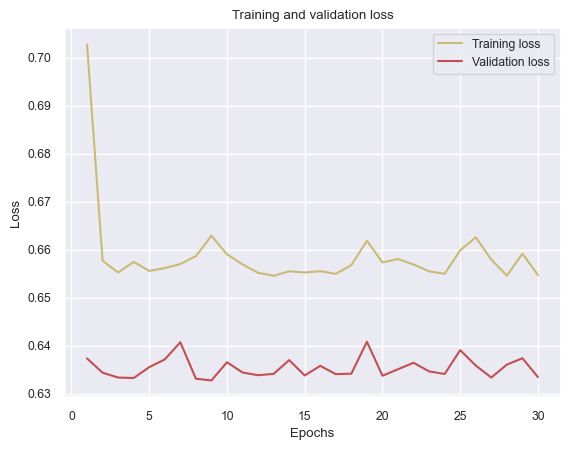

In [57]:
# 딥러닝 결과

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
# 데이터 불러오기 (csv, xlsx)

df = pd.read_csv("C:/ai/diabetes.csv")
df.drop('Outcome', axis=1, inplace=True)

# 데이터 분류
X=df.drop('BMI',axis=1)
y = pd.get_dummies(df['BMI']).values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0              6      148             72             35        0   
1              1       85             66             29        0   
2              8      183             64              0        0   
3              1       89             66             23       94   
4              0      137             40             35      168   
..           ...      ...            ...            ...      ...   
763           10      101             76             48      180   
764            2      122             70             27        0   
765            5      121             72             23      112   
766            1      126             60              0        0   
767            1       93             70             31        0   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21 

In [91]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer=Input(shape=(X_train.shape[1],))
layer1=Dense(8, activation="relu")(input_layer)
layer2=Dense(20, activation="relu")(layer1)
layer3=Dense(10, activation="relu")(layer2)
out_layer=Dense(1)(layer3)
model=Model(inputs=input_layer,outputs=out_layer)
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
n_epoch=32
n_size=32
history=model.fit(X_train,y_train, epochs=n_epoch, batch_size=32,validation_data= (X_test,y_test))

Epoch 1/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 42.4072 - mse: 42.4072 - val_loss: 5.9120 - val_mse: 5.9120
Epoch 2/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7033 - mse: 5.7033 - val_loss: 2.7659 - val_mse: 2.7659
Epoch 3/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1735 - mse: 3.1735 - val_loss: 1.4968 - val_mse: 1.4968
Epoch 4/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2801 - mse: 2.2801 - val_loss: 2.8374 - val_mse: 2.8374
Epoch 5/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1802 - mse: 1.1802 - val_loss: 1.6000 - val_mse: 1.6000
Epoch 6/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8861 - mse: 0.8861 - val_loss: 0.7470 - val_mse: 0.7470
Epoch 7/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6671 - mse: 0.6671 - val_loss: 0.2746 - val_mse: 0.2746
Epoch 8/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5004 - mse: 0.5004 - val_loss: 0.1847 - val_mse: 0.1847
Epoch 9/32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3952 - mse

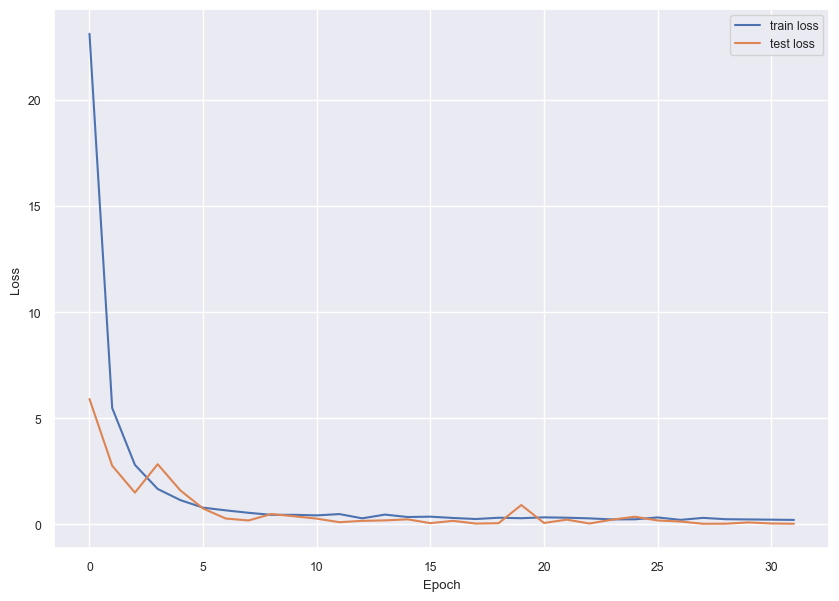

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311 - mse: 0.0311 
test accuracy:  0.030525853857398033


In [93]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(n_epoch), history.history['loss'], label='train loss')
plt.plot(range(n_epoch), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
test_loss, test_acc = model.evaluate(X_test,y_test)
print("test accuracy: ", test_acc)